In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
def draw_cutoff_left(percent, stats_array):
    xmin = plots.xlim()[0]
    xmax = plots.xlim()[1]
    cutoff = percentile(percent, stats_array)
    plots.plot([xmin, cutoff], [0,0], color='red', lw=4)
    plots.xlim(xmin, xmax);
    
def draw_cutoff_right(percent, stats_array):
    xmin = plots.xlim()[0]
    xmax = plots.xlim()[1]
    cutoff = percentile(100-percent, stats_array)
    plots.plot([cutoff, xmax], [0,0], color='red', lw=4)
    plots.xlim(xmin, xmax);

# Mendel

## 1. Select two hypotheses

* **Null:** For every plant, there is a 75% chance that it will have purple flowers, and a 25% chance that the flowers will be white, regardless of the colors in all the other plants.
* **Alternative:** Something else

In [3]:
flowers = Table().with_columns(
    'Color', make_array('Purple', 'White'),
    'Model Proportion', make_array(0.75, 0.25),
    'Plants', make_array(705, 224)
)

flowers

Color  | Model Proportion | Plants
Purple | 0.75             | 705
White  | 0.25             | 224

In [4]:
total_plants = flowers.column('Plants').sum()
total_plants

929

In [5]:
observed_proportion = flowers.column('Plants').item(0)/total_plants
observed_proportion

0.7588805166846071

## 2. Choose a test statistic

In [6]:
observed_statistic = abs(observed_proportion - 0.75)
observed_statistic

0.008880516684607098

## 3. Compute the Distribution of the Test Statistic under the Null Hypothesis

In [7]:
model_colors = make_array('Purple', 'Purple', 'Purple', 'White')

repetitions = 5000

sampled_stats = make_array()

for i in np.arange(repetitions):
    new_sample = np.random.choice(model_colors, total_plants)
    proportion_purple = np.count_nonzero(new_sample == 'Purple')/total_plants
    sampled_stats = np.append(sampled_stats, abs(proportion_purple - 0.75))

results = Table().with_column('Distance from 0.75', sampled_stats)
results.hist()

## 4. Compare the Prediction to the Observed Data

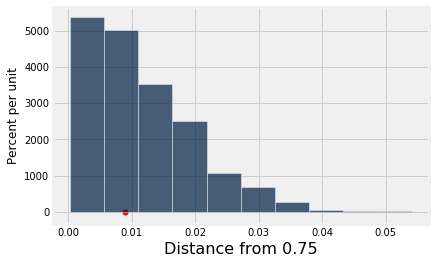

In [8]:
results.hist()

#Plot the observed statistic as a large red point on the horizontal axis
plots.scatter(observed_statistic, 0, color='red', s=30);

In [9]:
# use p value for quantitative comparison 
# between observed statistic and null distribution
empirical_P = np.count_nonzero(sampled_stats >= observed_statistic)/repetitions
empirical_P

0.5428

# Birth months

What month were you born in?

* A) Jan-Mar
* B) Apr-Jun
* C) Jul-Sep
* D) Oct-Dec

In [ ]:
birth_month = Table().with_columns(
    "Month", make_array("Jan-Mar", "Apr-Jun", "Jul-Sep", "Oct-Dec"),
    "Count", make_array(5,6,5,7))
birth_month

In [ ]:
size_of_class = sum(birth_month.column("Count"))
observed_statistic = sum(abs(birth_month.column("Count")/size_of_class - .25))
observed_statistic

How likely is this distribution of birth months?

In [ ]:
random_counts = birth_month.select("Month").sample(size_of_class).group("Month")
random_counts

tvds = make_array()
for i in np.arange(10000): # 10000 repetitions
    random_counts = birth_month.select("Month").sample(size_of_class).group("Month").column("count")
    tvd = sum(abs(random_counts/sum(random_counts) - .25))
    tvds = np.append(tvds, tvd)
    
results = Table().with_column('TVD', tvds)

results

In [ ]:
results.hist()

#Plot the observed statistic as a large red point on the horizontal axis
plots.scatter(observed_statistic, 0, color='red', s=30);

In [ ]:
results.where('TVD', are.above_or_equal_to(observed_statistic)).num_rows / 10000

## The TAs defense

In [10]:
# The data
scores = Table.read_table('scores_by_section.csv')
scores

Section | Prelim
1       | 22
2       | 12
2       | 23
2       | 14
1       | 20
3       | 25
4       | 19
1       | 24
5       | 8
6       | 14
... (349 rows omitted)

In [11]:
np.average(scores.column('Prelim'))

15.493036211699165

In [13]:
scores.group('Section', np.average).show()

In [14]:
scores.group('Section')

Section | count
1       | 32
2       | 32
3       | 27
4       | 30
5       | 33
6       | 32
7       | 24
8       | 29
9       | 30
10      | 34
... (2 rows omitted)

In [15]:
# Simulating the test statistic under the null hypothesis
repetitions = 10000
sec_3_size = 27
sec_3_mean = 13.6667
means = make_array()
for i in np.arange(repetitions):
    new_mean = scores.sample(sec_3_size).column('Prelim').mean()
    means = np.append(means, new_mean)

# The P-value (an empirical approximation based on the simulation)
empirical_P = np.count_nonzero(means <= sec_3_mean)/repetitions

Empirical P-value: 0.0681


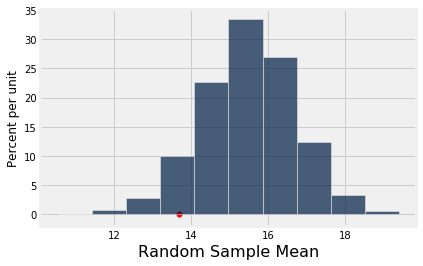

In [16]:
# Displaying the results
print('Empirical P-value:', empirical_P)
results = Table().with_column('Random Sample Mean', means)
results.hist()  
plots.scatter(sec_3_mean, 0, color='red', s=30);

In [ ]:
results.hist()
plots.scatter(12, 0)
draw_cutoff_left(12, means)

## Flipping coins

In [17]:
coin = make_array('Heads', 'Tails')
num_tosses = 400

repetitions = 10000
heads = make_array()
for i in np.arange(repetitions):
    tosses = np.random.choice(coin, 400)
    heads = np.append(heads, np.count_nonzero(tosses == 'Heads'))

sampled_stats = abs(heads - 200)
results = Table().with_column('|Number of Heads - 200|', sampled_stats)
results.hist(bins = np.arange(0, 45, 5))

In [18]:
results.hist(bins = np.arange(0, 45, 5))
plots.scatter(22,0)
draw_cutoff_right(6, sampled_stats)
plots.xlim(0, 45);